# Import

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

from lightgbm import LGBMRegressor

#import lightgbm as lgb

from lightgbm import plot_importance 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

# Data Import
1. iszero
2. nozero
3. nf (new feature)
---
- input featrue = 27
- 7일간 data를 하나의 instance화 한다면 -> input matrix 7 x 26 -> ouput matrix 7 x 1 (가격만 출력)
- 2148 row x 26 columns
- 다변량 시계열(multiivariate time series) 예측 system
- In our cousre DA, design for 단변량 시계열(univariate time series) prediction
- 2014.01.01~2020.12.31 data
- 건고추는 2014.01.22부터, 나머지는 대부분 2014.01.02부터

In [23]:
path = "./Dataset/"
price_tag = ['건고추가격', '대파가격', '마늘가격', '무가격', '배추가격']
crops_en = ['peppers', 'green_onion', 'garlic', 'radish', 'cabbage']

# is zero
isZero = pd.read_csv(path+"da_data.csv")

# no zero 
noZero = pd.read_csv(path+"da_data_nozero.csv")

# new features 
nf_peppers = pd.read_csv(path+"last건고추.csv" ,encoding='cp949')
nf_green_onion = pd.read_csv(path+"last대파.csv" ,encoding='cp949')
nf_garlic = pd.read_csv(path+"last마늘.csv" ,encoding='cp949')
nf_radish = pd.read_csv(path+"last무.csv" ,encoding='cp949')
nf_cabbage = pd.read_csv(path+"last배추.csv" ,encoding='cp949')

original_data_list = [nf_peppers, nf_green_onion, nf_garlic, nf_radish, nf_cabbage]

In [24]:
X_column_pepper = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '건고추거래량', '건고추생산량', '건고추저장이월량', '건고추수입량', '건고추수입금액',
       '건고추재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column_pepper = ['건고추가격']

X_column_green_onion = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '대파거래량', '대파생산량', '대파저장이월량', '대파수입량', '대파수입금액',
       '대파재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column_green_onion = ['대파가격']

X_column_garlic = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '마늘거래량', '마늘생산량', '마늘저장이월량', '마늘수입량', '마늘수입금액',
       '마늘재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column_garlic = ['마늘가격']

X_column_radish = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '무거래량', '무생산량', '무저장이월량', '무수입량', '무수입금액',
       '무재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column_radish = ['무가격']

X_column_cabbage = ['평균강수량', '최대강수량', '평균기온', '최고기온', '최저기온', '평균습도', '최저습도', '평균풍속',
       '최대풍속', '배추거래량', '배추생산량', '배추저장이월량', '배추수입량', '배추수입금액',
       '배추재배면적', '고급휘발유', '보통휘발유', '자동차용경유', '소비자물가지수', '농축수산물', '공업제품', '집세',
       '공공서비스', '개인서비스', '근원물가', '생활물가']
y_column_cabbage = ['배추가격']

X_column_list = [X_column_pepper, X_column_green_onion, X_column_garlic, X_column_radish, X_column_cabbage]
y_column_list = [y_column_pepper, y_column_green_onion, y_column_garlic, y_column_radish, y_column_cabbage] # oh...is same thing with p-tag...

# 함수화

In [29]:
def pre_processing(data) :
    scaler = MinMaxScaler()
    scale_cols = data.iloc[:,1:].columns
    
    data.sort_index(ascending=False).reset_index(drop=True)
    
    scaled = scaler.fit_transform(data[scale_cols])
    scaled = pd.DataFrame(scaled)
    scaled.columns = scale_cols
    
    return scaled


def get_data_split(data, X_column, y_column) :
    train_X, test_X, train_y, test_y = train_test_split(
    data[X_column], 
    data[y_column],
    test_size=0.2,
    shuffle=True,   # random split 
    random_state=42) # seed 고정, same sampling 
    print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)
    
    return train_X, test_X, train_y, test_y


def get_model_cv_prediction(model, X_data, y_label) :
    neg_mse_scores = cross_val_score(model, X_data, y_label, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('####', model.__class__.__name__, '####')
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))


def gridsearchCV (model, parameters, X_train, y_train) :
    grid = GridSearchCV(model, param_grid = parameters, scoring='accuracy', cv=2) # cv is fold num
    grid.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid.best_params_)
    print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid.best_score_))
    print('GridSearchCV 최적 하이퍼 파라미터로 학습된 Esimator 반환')
    
    return grid.best_estimator_


def feature_importance(model_xgb) : 
    %matplotlib inline
    plt.rcParams['axes.unicode_minus'] = False
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = fm.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

    fig, ax = plt.subplots(figsize=(10,12))
    plot_importance(model_xgb, ax=ax)


def graph(pred, test_label) :
    plt.figure(figsize=(16, 9))
    plt.plot(test_label, label = 'actual')
    plt.plot(pred, label = 'prediction')
    plt.legend()
    plt.show()

# EDA

In [31]:
original_data_list[0].iloc[:,1:].describe()

,건고추가격,평균강수량,최대강수량,평균기온,최고기온,최저기온,평균습도,최저습도,평균풍속,최대풍속,...,보통휘발유,자동차용경유,소비자물가지수,농축수산물,공업제품,집세,공공서비스,개인서비스,근원물가,생활물가
count,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,...,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000,2211.000000
mean,11483.896244,3.447716,25.107779,13.801764,19.296472,9.038173,68.556309,23.387607,1.863139,11.852782,...,1509.643532,1319.158806,1.005518,2.659701,0.348666,1.174355,0.219629,2.055812,1.349525,0.849977
std,7693.517399,8.822751,45.136648,9.158504,9.113237,9.609319,12.967969,13.096627,0.640774,4.203956,...,140.142973,142.960193,0.624635,4.435595,1.054768,0.986670,1.318581,0.563246,0.570134,0.999060
min,18.582714,0.000000,0.000000,-10.400000,-5.400000,-14.600000,31.000000,0.000000,0.800000,5.200000,...,1247.580000,1058.750000,-0.400000,-8.200000,-2.000000,-0.200000,-6.600000,0.900000,0.100000,-0.900000
25%,7500.000000,0.000000,0.250000,5.900000,11.700000,0.700000,59.000000,13.000000,1.400000,8.800000,...,1411.275000,1225.140000,0.600000,-0.100000,-0.500000,0.200000,-0.300000,1.700000,0.900000,0.000000
50%,10411.421000,0.100000,5.900000,14.400000,20.700000,9.100000,70.000000,22.000000,1.700000,10.900000,...,1500.060000,1308.390000,1.000000,1.800000,0.100000,1.200000,0.500000,1.900000,1.300000,0.700000
75%,13500.000000,2.000000,29.500000,21.700000,27.000000,17.700000,78.000000,32.000000,2.200000,14.000000,...,1561.465000,1385.520000,1.500000,5.200000,1.300000,2.000000,1.000000,2.500000,1.800000,1.500000
max,170045.888900,101.900000,384.300000,30.300000,36.600000,25.900000,96.000000,68.000000,5.200000,49.000000,...,1884.910000,1703.670000,2.500000,13.500000,2.400000,2.700000,2.100000,2.900000,2.600000,3.500000


# Preproecssing 

input_data_list -> 0:건고추, 1:대파, 2:마늘, 3:무, 4:배추

In [32]:
input_data_list = []
for d in original_data_list : 
    processed = pre_processing(d)
    input_data_list.append(processed)

# Modeling 
사이킷런 래퍼 클래스 -> 사이킷런 기반 Estimator를 상속받아 작성됨  


In [33]:
input_data = pre_processing(input_data_list[0])
 
train_X, test_X, train_y, test_y = get_data_split(input_data_list[0], X_column_list[0], y_column_list[0])

(1768, 26) (443, 26) (1768, 1) (443, 1)


In [34]:
dtrain = xgb.DMatrix(data=train_X, label=train_y)
dtest = xgb.DMatrix(data=test_X, label=test_y)
wlist = [(dtrain, 'train'), (dtest,'eval')]

NameError: name 'xgb' is not defined

In [36]:
params = { 
    'max_depth':3,
    'eta':0.1,
    'objective':'reg:linear',
    'eval_metric':'logloss',
    'early_stoppings':100
}
evals = [(test_X, test_y)]

model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.001)
model_lgbm.fit(train_X, train_y, early_stopping_rounds=100, eval_metric="logloss",
               eval_set=evals, verbose=True)

[1]	valid_0's l2: 0.00205071
[2]	valid_0's l2: 0.00204931
[3]	valid_0's l2: 0.00204795
[4]	valid_0's l2: 0.00204656
[5]	valid_0's l2: 0.00204521
[6]	valid_0's l2: 0.00204383
[7]	valid_0's l2: 0.00204248
[8]	valid_0's l2: 0.0020411
[9]	valid_0's l2: 0.00203976
[10]	valid_0's l2: 0.00203839
[11]	valid_0's l2: 0.00203703
[12]	valid_0's l2: 0.00203567
[13]	valid_0's l2: 0.00203431
[14]	valid_0's l2: 0.00203295
[15]	valid_0's l2: 0.0020316
[16]	valid_0's l2: 0.00203025
[17]	valid_0's l2: 0.0020289
[18]	valid_0's l2: 0.00202756
[19]	valid_0's l2: 0.00202622
[20]	valid_0's l2: 0.00202488
[21]	valid_0's l2: 0.00202354
[22]	valid_0's l2: 0.00202221
[23]	valid_0's l2: 0.00202088
[24]	valid_0's l2: 0.00201955
[25]	valid_0's l2: 0.00201822
[26]	valid_0's l2: 0.00201691
[27]	valid_0's l2: 0.00201558
[28]	valid_0's l2: 0.00201426
[29]	valid_0's l2: 0.00201293
[30]	valid_0's l2: 0.00201161
[31]	valid_0's l2: 0.00201028
[32]	valid_0's l2: 0.00200896
[33]	valid_0's l2: 0.00200764
[34]	valid_0's l2: 0.0

[347]	valid_0's l2: 0.00170506
[348]	valid_0's l2: 0.00170428
[349]	valid_0's l2: 0.00170353
[350]	valid_0's l2: 0.00170279
[351]	valid_0's l2: 0.00170203
[352]	valid_0's l2: 0.00170141
[353]	valid_0's l2: 0.00170063
[354]	valid_0's l2: 0.00169989
[355]	valid_0's l2: 0.00169915
[356]	valid_0's l2: 0.00169838
[357]	valid_0's l2: 0.00169771
[358]	valid_0's l2: 0.00169697
[359]	valid_0's l2: 0.0016962
[360]	valid_0's l2: 0.0016955
[361]	valid_0's l2: 0.00169473
[362]	valid_0's l2: 0.00169401
[363]	valid_0's l2: 0.00169327
[364]	valid_0's l2: 0.00169253
[365]	valid_0's l2: 0.00169176
[366]	valid_0's l2: 0.00169107
[367]	valid_0's l2: 0.00169039
[368]	valid_0's l2: 0.00168967
[369]	valid_0's l2: 0.00168902
[370]	valid_0's l2: 0.00168831
[371]	valid_0's l2: 0.00168763
[372]	valid_0's l2: 0.00168695
[373]	valid_0's l2: 0.00168626
[374]	valid_0's l2: 0.00168554
[375]	valid_0's l2: 0.00168488
[376]	valid_0's l2: 0.00168418
[377]	valid_0's l2: 0.00168351
[378]	valid_0's l2: 0.00168283
[379]	vali

[697]	valid_0's l2: 0.00151337
[698]	valid_0's l2: 0.00151298
[699]	valid_0's l2: 0.00151257
[700]	valid_0's l2: 0.00151218
[701]	valid_0's l2: 0.0015118
[702]	valid_0's l2: 0.00151141
[703]	valid_0's l2: 0.001511
[704]	valid_0's l2: 0.00151061
[705]	valid_0's l2: 0.0015102
[706]	valid_0's l2: 0.00150982
[707]	valid_0's l2: 0.00150939
[708]	valid_0's l2: 0.00150905
[709]	valid_0's l2: 0.00150862
[710]	valid_0's l2: 0.00150825
[711]	valid_0's l2: 0.00150785
[712]	valid_0's l2: 0.00150743
[713]	valid_0's l2: 0.00150707
[714]	valid_0's l2: 0.00150664
[715]	valid_0's l2: 0.00150626
[716]	valid_0's l2: 0.00150589
[717]	valid_0's l2: 0.00150552
[718]	valid_0's l2: 0.00150513
[719]	valid_0's l2: 0.00150476
[720]	valid_0's l2: 0.00150437
[721]	valid_0's l2: 0.00150401
[722]	valid_0's l2: 0.00150362
[723]	valid_0's l2: 0.00150323
[724]	valid_0's l2: 0.00150286
[725]	valid_0's l2: 0.0015025
[726]	valid_0's l2: 0.0015021
[727]	valid_0's l2: 0.00150173
[728]	valid_0's l2: 0.00150135
[729]	valid_0'

LGBMRegressor(learning_rate=0.001, n_estimators=1000)

In [37]:
pred_lgbm = model_lgbm.predict(test_X)

# 평가 지표 및 해석

In [38]:
# rmse for model_1 
mse = mean_squared_error(test_y, pred_lgbm)
print("mse01: %f" % mse)

rmse = np.sqrt(mse)
print("rmse : %f" %rmse)

mse01: 0.001435
rmse : 0.037882


In [39]:
get_model_cv_prediction(model_lgbm, train_X, train_y)

#### LGBMRegressor ####
5 교차 검증의 평균 RMSE : 0.037


In [40]:
true_y = test_y.to_numpy()
true_y = np.ravel(true_y)

df_result = pd.DataFrame(list(zip(true_y, pred_lgbm)), columns=['true_y', 'lgbm_pred'])
df_result

,true_y,lgbm_pred
0,0.017550,0.047938
1,0.024152,0.059610
2,0.126125,0.093362
3,0.062242,0.060092
4,0.068138,0.064275
...,...,...
438,0.037762,0.063090
439,0.073004,0.056332
440,0.021358,0.048657
441,0.043021,0.049098


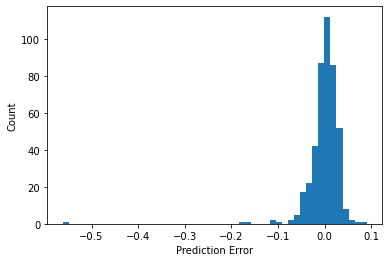

In [41]:
error = pred_lgbm - true_y
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

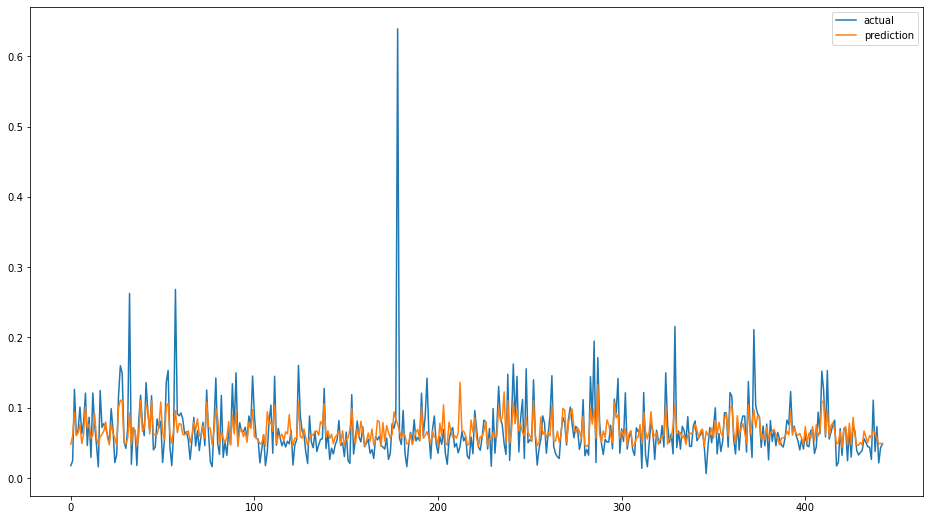

In [42]:
graph(pred_lgbm, true_y)

<AxesSubplot:>

C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Gl

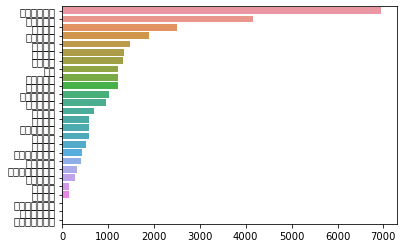

In [43]:
# 회귀 트리 Regressor 클래스는 선형 호귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없다. 
# 대신 feature_importances_를 이요해 피처별 중요도를 알 수 있다. 

feature_series = pd.Series(data=model_lgbm.feature_importances_, index=train_X.columns)
feature_series = feature_series.sort_values(ascending=False) 
sns.barplot(x = feature_series, y=feature_series.index)